In [1]:
# http://r2rt.com/implementing-batch-normalization-in-tensorflow.html
# http://ruishu.io/2016/12/27/batchnorm/
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib 

In [2]:
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
print mnist.train.images.shape, mnist.train.labels.shape
print mnist.validation.images.shape, mnist.validation.labels.shape

(55000, 784) (55000, 10)
(5000, 784) (5000, 10)


In [5]:
def add_layer(inputs, in_size, out_size, keep_prob=1.0, batch_norm=False, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    
    score = tf.matmul(inputs, Weights)
    
    
    if not batch_norm:
        biases = tf.Variable(tf.zeros([out_size]) + 0.1)
        score = score + biases
        
    else:
        batch_mean, batch_var = tf.nn.moments(score, [0])
        scale = tf.Variable(tf.ones([out_size]))
        beta = tf.Variable(tf.zeros([out_size]))
        
        score = tf.nn.batch_normalization(score, batch_mean, batch_var, beta, scale, BN_EPSILON)
        
    if activation_function:
        score = activation_function(score)
        
    return tf.nn.dropout(score, keep_prob)


BATCH_SIZE = 500
TRAINING_ITER = 3000
LEARNING_RATE = 0.1
HIDDEN_UNITS = [100, 100]
KEEP_PROB = 1.0
INPUT_UNITS = 784
N_CLASSES = 10
BN_EPSILON = 1e-3


#build graph

x = tf.placeholder(tf.float32, [None, INPUT_UNITS])
y = tf.placeholder(tf.float32, [None, N_CLASSES])

h1 = add_layer(x, INPUT_UNITS, HIDDEN_UNITS[0], activation_function=tf.nn.sigmoid)
h1_bn = add_layer(x, INPUT_UNITS, HIDDEN_UNITS[0], batch_norm=True, activation_function=tf.nn.sigmoid)

h2 = add_layer(h1, HIDDEN_UNITS[0], HIDDEN_UNITS[1], activation_function=tf.nn.sigmoid)
h2_bn = add_layer(h1_bn, HIDDEN_UNITS[0], HIDDEN_UNITS[1], batch_norm=True, activation_function=tf.nn.sigmoid)

predictions = add_layer(h2, HIDDEN_UNITS[1], N_CLASSES)
predictions_bn = add_layer(h2_bn, HIDDEN_UNITS[1], N_CLASSES)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=predictions))
loss_bn = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=predictions_bn))

optimizer = tf.train.AdamOptimizer(LEARNING_RATE)

train_step = optimizer.minimize(loss)
train_step_bn = optimizer.minimize(loss_bn)

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(predictions, 1), tf.arg_max(y, 1)), tf.float32))
accuracy_bn = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(predictions_bn, 1), tf.arg_max(y, 1)), tf.float32))


In [6]:
init = tf.global_variables_initializer()

valid_acc = []
epoch = []
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(TRAINING_ITER):
        batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
        sess.run(train_step, feed_dict = {x: batch_xs, y:batch_ys})
        if i % 50 == 0:
            epoch.append(i)
            print 'TRAIN_ACC@%d:' %i, sess.run(accuracy, feed_dict = {x: batch_xs, y: batch_ys})
            valid_acc.append(sess.run(accuracy, feed_dict = {x: mnist.validation.images, y: mnist.validation.labels}))
plt.title('MNIST_MLN_BN')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
no_bn_line, = plt.plot(epoch, valid_acc, 'r-')

TRAIN_ACC@0: 0.19
TRAIN_ACC@50: 0.846
TRAIN_ACC@100: 0.91
TRAIN_ACC@150: 0.924
TRAIN_ACC@200: 0.928
TRAIN_ACC@250: 0.93
TRAIN_ACC@300: 0.936
TRAIN_ACC@350: 0.932
TRAIN_ACC@400: 0.938
TRAIN_ACC@450: 0.962
TRAIN_ACC@500: 0.942
TRAIN_ACC@550: 0.932
TRAIN_ACC@600: 0.96
TRAIN_ACC@650: 0.95
TRAIN_ACC@700: 0.936
TRAIN_ACC@750: 0.958
TRAIN_ACC@800: 0.956
TRAIN_ACC@850: 0.95
TRAIN_ACC@900: 0.942
TRAIN_ACC@950: 0.936
TRAIN_ACC@1000: 0.948
TRAIN_ACC@1050: 0.966
TRAIN_ACC@1100: 0.936
TRAIN_ACC@1150: 0.954
TRAIN_ACC@1200: 0.954
TRAIN_ACC@1250: 0.944
TRAIN_ACC@1300: 0.954
TRAIN_ACC@1350: 0.958
TRAIN_ACC@1400: 0.954
TRAIN_ACC@1450: 0.946
TRAIN_ACC@1500: 0.946
TRAIN_ACC@1550: 0.972
TRAIN_ACC@1600: 0.946
TRAIN_ACC@1650: 0.954
TRAIN_ACC@1700: 0.958
TRAIN_ACC@1750: 0.948
TRAIN_ACC@1800: 0.976
TRAIN_ACC@1850: 0.958
TRAIN_ACC@1900: 0.964
TRAIN_ACC@1950: 0.956
TRAIN_ACC@2000: 0.956
TRAIN_ACC@2050: 0.96
TRAIN_ACC@2100: 0.958
TRAIN_ACC@2150: 0.952
TRAIN_ACC@2200: 0.954
TRAIN_ACC@2250: 0.952
TRAIN_ACC@2300: 0.

TRAIN_BN@0: 0.368
TRAIN_BN@50: 0.928
TRAIN_BN@100: 0.936
TRAIN_BN@150: 0.946
TRAIN_BN@200: 0.968
TRAIN_BN@250: 0.966
TRAIN_BN@300: 0.964
TRAIN_BN@350: 0.976
TRAIN_BN@400: 0.976
TRAIN_BN@450: 0.976
TRAIN_BN@500: 0.982
TRAIN_BN@550: 0.982
TRAIN_BN@600: 0.99
TRAIN_BN@650: 0.99
TRAIN_BN@700: 0.99
TRAIN_BN@750: 0.988
TRAIN_BN@800: 0.994
TRAIN_BN@850: 0.994
TRAIN_BN@900: 0.994
TRAIN_BN@950: 0.992
TRAIN_BN@1000: 0.99
TRAIN_BN@1050: 0.996
TRAIN_BN@1100: 0.998
TRAIN_BN@1150: 0.992
TRAIN_BN@1200: 0.996
TRAIN_BN@1250: 0.998
TRAIN_BN@1300: 0.996
TRAIN_BN@1350: 0.998
TRAIN_BN@1400: 0.998
TRAIN_BN@1450: 1.0
TRAIN_BN@1500: 0.996
TRAIN_BN@1550: 1.0
TRAIN_BN@1600: 1.0
TRAIN_BN@1650: 0.998
TRAIN_BN@1700: 0.998
TRAIN_BN@1750: 1.0
TRAIN_BN@1800: 0.998
TRAIN_BN@1850: 0.998
TRAIN_BN@1900: 1.0
TRAIN_BN@1950: 0.998
TRAIN_BN@2000: 1.0
TRAIN_BN@2050: 0.998
TRAIN_BN@2100: 0.998
TRAIN_BN@2150: 0.996
TRAIN_BN@2200: 1.0
TRAIN_BN@2250: 0.998
TRAIN_BN@2300: 1.0
TRAIN_BN@2350: 0.998
TRAIN_BN@2400: 1.0
TRAIN_BN@2450: 0

<IPython.core.display.Javascript object>


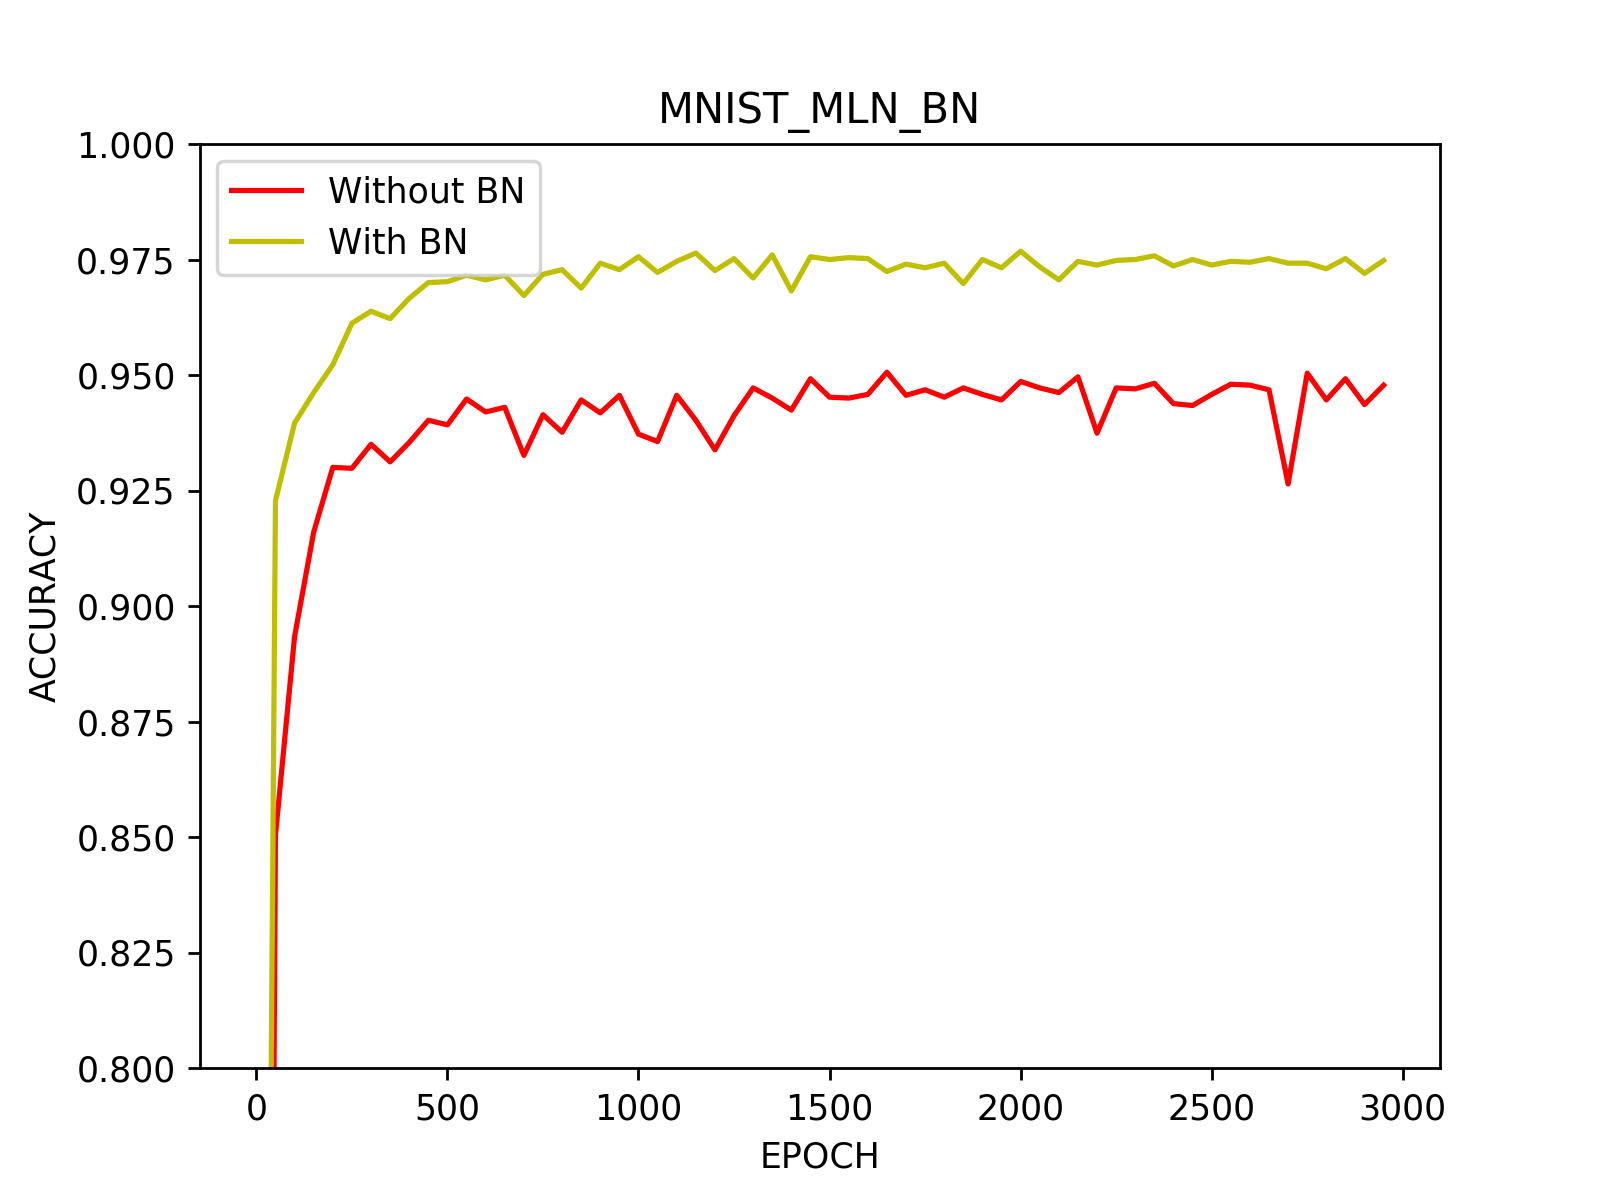

In [7]:
valid_acc = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(TRAINING_ITER):
        batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
        sess.run(train_step_bn, feed_dict = {x: batch_xs, y:batch_ys})
        if i % 50 == 0:
            print 'TRAIN_BN@%d:' %i, sess.run(accuracy_bn, feed_dict = {x: batch_xs, y: batch_ys})
            valid_acc.append(sess.run(accuracy_bn, feed_dict = {x: mnist.validation.images, y: mnist.validation.labels}))
bn_line, = plt.plot(epoch, valid_acc, 'y-')
plt.legend([no_bn_line, bn_line], ['Without BN', 'With BN'])
plt.ylim([0.8, 1.0])
plt.show()